### ESMA 4016
### Random Forest con las libreria H20  y scikit-learn
#### Edgar Acuna

In [45]:
import h2o
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import graphviz
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
h2o.no_progress()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 hours 29 mins
H2O cluster timezone:,America/La_Paz
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.6
H2O cluster version age:,18 days
H2O cluster name:,H2O_from_python_edgar2017_77b3vt
H2O cluster total nodes:,1
H2O cluster free memory:,1.083 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


### I- Aplicando Random Forest a Diabetes usando H20. 

In [46]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
# Create test/train split
#train, test = vehicle.split_frame(ratios=[0.75], seed=1)
model=H2ORandomForestEstimator(ntrees=50,max_depth=10,nfolds=10)
model.train(myx, myy, training_frame = diabetes)
y_pred=model.predict(diabetes)
print (y_pred['predict']==diabetes['C9']).sum()/float(len(diabetes))
model.model_performance(diabetes)

0.958333333333

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0439673093775
RMSE: 0.209683831941
LogLoss: 0.189688487799
Mean Per-Class Error: 0.0125970149254
AUC: 0.999361940299
Gini: 0.998723880597
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.438188542724: 


,1,2,Error,Rate
1,493.0,7.0,0.014,(7.0/500.0)
2,3.0,265.0,0.0112,(3.0/268.0)
Total,496.0,272.0,0.013,(10.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4381885,0.9814815,182.0
max f2,0.4105561,0.9889299,189.0
max f0point5,0.4929160,0.9884615,169.0
max accuracy,0.4381885,0.9869792,182.0
max precision,0.9921538,1.0,0.0
max recall,0.4105561,1.0,189.0
max specificity,0.9921538,1.0,0.0
max absolute_mcc,0.4381885,0.9715056,182.0
max min_per_class_accuracy,0.4381885,0.986,182.0
max mean_per_class_accuracy,0.4381885,0.9874030,182.0


Gains/Lift Table: Avg response rate: 34.90 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9602292,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0298507,186.5671642,186.5671642
,2,0.0208333,0.9450450,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0597015,186.5671642,186.5671642
,3,0.03125,0.9369838,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0895522,186.5671642,186.5671642
,4,0.0403646,0.9301362,2.8656716,2.8656716,1.0,1.0,0.0261194,0.1156716,186.5671642,186.5671642
,5,0.0507812,0.9239763,2.8656716,2.8656716,1.0,1.0,0.0298507,0.1455224,186.5671642,186.5671642
,6,0.1002604,0.8770382,2.8656716,2.8656716,1.0,1.0,0.1417910,0.2873134,186.5671642,186.5671642
,7,0.1510417,0.8231111,2.8656716,2.8656716,1.0,1.0,0.1455224,0.4328358,186.5671642,186.5671642
,8,0.2005208,0.7526131,2.8656716,2.8656716,1.0,1.0,0.1417910,0.5746269,186.5671642,186.5671642
,9,0.3007812,0.5988037,2.8656716,2.8656716,1.0,1.0,0.2873134,0.8619403,186.5671642,186.5671642
,10,0.3997396,0.3184113,1.3951296,2.5016287,0.4868421,0.8729642,0.1380597,1.0,39.5129615,150.1628664


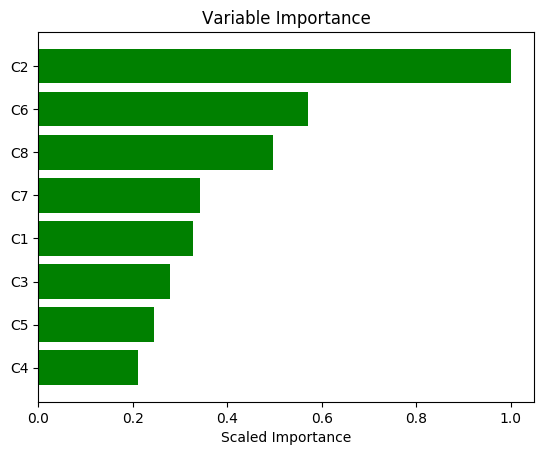

In [47]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance =model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

#### Segun random Forest las variables mas importantes serian plas, age y mass

### II Random Forest  para Diabetes usando scikit learn

In [48]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
#La variable de respuesta y debe ser binaria (0,1)
y=data['class']-1
X=data.iloc[:,0:8]
clf = RandomForestClassifier(n_estimators=50,max_depth=10, random_state=0)
clf.fit(X, y)
print "la Precision estimada es", clf.score(X,y)

la Precision estimada es 0.986979166667


In [49]:
# Tasa de precision
predictions = clf.predict(X)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       500
          1       1.00      0.97      0.98       268

avg / total       0.99      0.99      0.99       768



In [50]:
print(clf.feature_importances_)

[ 0.08178093  0.25522871  0.08433383  0.07064764  0.06914087  0.17326173
  0.12167218  0.14393411]


#### Nuevamente las variables mas importantes salieron plas mass y age

### III. Random Forest para Landsat usando H2o

In [51]:
#Leyendo los datos
datos= h2o.import_file("http://academic.uprm.edu/eacuna/landsat.txt")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36']
datos['C37']=datos['C37'].asfactor()
myy="C37"
model=H2ORandomForestEstimator(ntrees=50,max_depth=10,nfolds=10)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print (y_pred['predict']==datos['C37']).sum()/float(len(datos))
model.model_performance(datos)

0.983540022548

ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.0260482023278
RMSE: 0.161394554827
LogLoss: 0.112998030668
Mean Per-Class Error: 0.0257998900873
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,Error,Rate
1072.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 1,072"
0.0,476.0,0.0,1.0,1.0,1.0,0.0062630,3 / 479
0.0,0.0,961.0,0.0,0.0,0.0,0.0,0 / 961
0.0,0.0,32.0,371.0,0.0,12.0,0.1060241,44 / 415
9.0,0.0,0.0,1.0,455.0,5.0,0.0319149,15 / 470
0.0,0.0,5.0,6.0,0.0,1027.0,0.0105973,"11 / 1,038"
1081.0,476.0,998.0,379.0,456.0,1045.0,0.0164600,"73 / 4,435"


Top-6 Hit Ratios: 


k,hit_ratio
1,0.98354
2,0.9995490
3,0.9995490
4,0.9997745
5,1.0
6,1.0


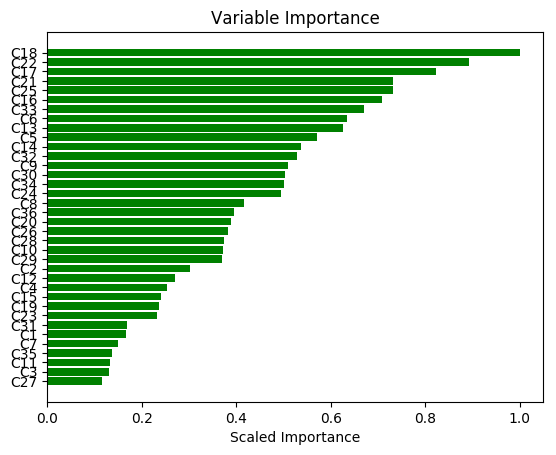

In [52]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance =model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

#### Las 6 variables mas importantes c18, c17, c22, c21, c24 y c20

### IV. Random Forest usando Scikit-Learn

In [53]:
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]-1
names=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36','C37']
X=data.iloc[:,0:36]
clf = RandomForestClassifier(n_estimators=50,max_depth=10, random_state=0)
clf.fit(X, y)
print "la Precision estimada es", clf.score(X,y)

la Precision estimada es 0.972717023675


In [54]:
predictions = clf.predict(X)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99      1072
          1       1.00      1.00      1.00       479
          2       0.95      1.00      0.97       961
          3       0.98      0.80      0.88       415
          4       1.00      0.93      0.97       470
          5       0.96      0.99      0.98      1038

avg / total       0.97      0.97      0.97      4435



In [55]:
print(clf.feature_importances_)

[ 0.0151426   0.02236955  0.00933652  0.01346124  0.03756244  0.02431621
  0.00885772  0.01182643  0.02164484  0.01734902  0.00778902  0.02265685
  0.03495008  0.04105357  0.02258549  0.03426316  0.08886045  0.05336134
  0.02783217  0.04746638  0.04815995  0.04380354  0.01428742  0.02988966
  0.04441645  0.02346674  0.00710566  0.02775813  0.02947498  0.02382096
  0.00788551  0.03829542  0.03270221  0.03890708  0.00804944  0.01929177]


#### Las variables mas importante son 17, 18, 21, 20, 25 y 22

### V. Aplicando Random Forest   a un dataset con missing values 

In [56]:
#Leyendo los datos
datos= h2o.import_file("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",na_strings=[' ?'])
myx=['C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8','C9','C10','C11', 'C12','C13','C14']
datos['C15']=datos['C15'].asfactor()
myy="C15"
model=H2ORandomForestEstimator(ntrees=100,max_depth=20,nfolds=10)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print (y_pred['predict']==datos['C15']).sum()/float(len(datos))
model.model_performance(datos)

0.941801541722

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0488896643114
RMSE: 0.22111007284
LogLoss: 0.170407009804
Mean Per-Class Error: 0.0592785015409
AUC: 0.986004376423
Gini: 0.972008752846
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.405010982398: 


,<=50K,>50K,Error,Rate
<=50K,23587.0,1133.0,0.0458,(1133.0/24720.0)
>50K,713.0,7128.0,0.0909,(713.0/7841.0)
Total,24300.0,8261.0,0.0567,(1846.0/32561.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4050110,0.8853559,205.0
max f2,0.2888210,0.9237098,245.0
max f0point5,0.5462948,0.8966088,157.0
max accuracy,0.4320782,0.9441663,196.0
max precision,0.9998713,1.0,0.0
max recall,0.1192849,1.0,317.0
max specificity,0.9998713,1.0,0.0
max absolute_mcc,0.4050110,0.8482410,205.0
max min_per_class_accuracy,0.3607320,0.9377023,220.0
max mean_per_class_accuracy,0.3211962,0.9407215,234.0


Gains/Lift Table: Avg response rate: 24.08 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100120,0.9984528,4.1526591,4.1526591,1.0,1.0,0.0415763,0.0415763,315.2659100,315.2659100
,2,0.0200240,0.9928215,4.1526591,4.1526591,1.0,1.0,0.0415763,0.0831527,315.2659100,315.2659100
,3,0.0300052,0.9855441,4.1526591,4.1526591,1.0,1.0,0.0414488,0.1246015,315.2659100,315.2659100
,4,0.0400172,0.9739226,4.1526591,4.1526591,1.0,1.0,0.0415763,0.1661778,315.2659100,315.2659100
,5,0.0500292,0.9545679,4.1526591,4.1526591,1.0,1.0,0.0415763,0.2077541,315.2659100,315.2659100
,6,0.1000276,0.8110297,4.1322529,4.1424591,0.9950860,0.9975438,0.2066063,0.4143604,313.2252912,314.2459139
,7,0.1500261,0.6883764,3.8465663,4.0438484,0.9262899,0.9737973,0.1923224,0.6066828,284.6566291,304.3848380
,8,0.2000246,0.5558342,3.3644701,3.8740299,0.8101966,0.9329034,0.1682183,0.7749012,236.4470118,287.4029892
,9,0.3000215,0.3032432,1.9283847,3.2255479,0.4643735,0.7767428,0.1928325,0.9677337,92.8384692,222.5547881
,10,0.4000184,0.1516523,0.3099190,2.4966966,0.0746314,0.6012284,0.0309909,0.9987247,-69.0081032,149.6696615


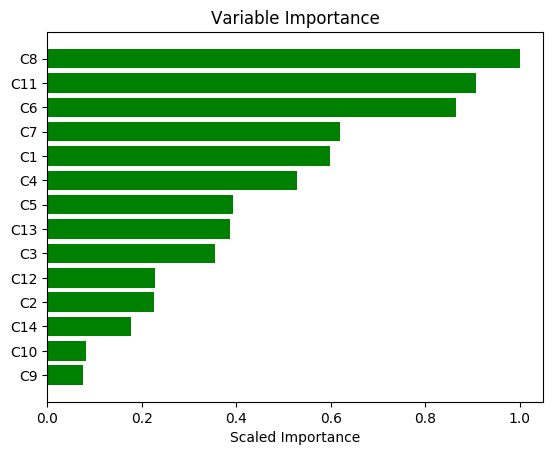

In [57]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()